In [83]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns

In [84]:
df = pd.read_csv('Datasets/Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [85]:
df['Age'] = df['Age'].astype('float')

In [86]:
# Used for later  transformations 
column_names = df.columns

In [87]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Plot to visualize the data

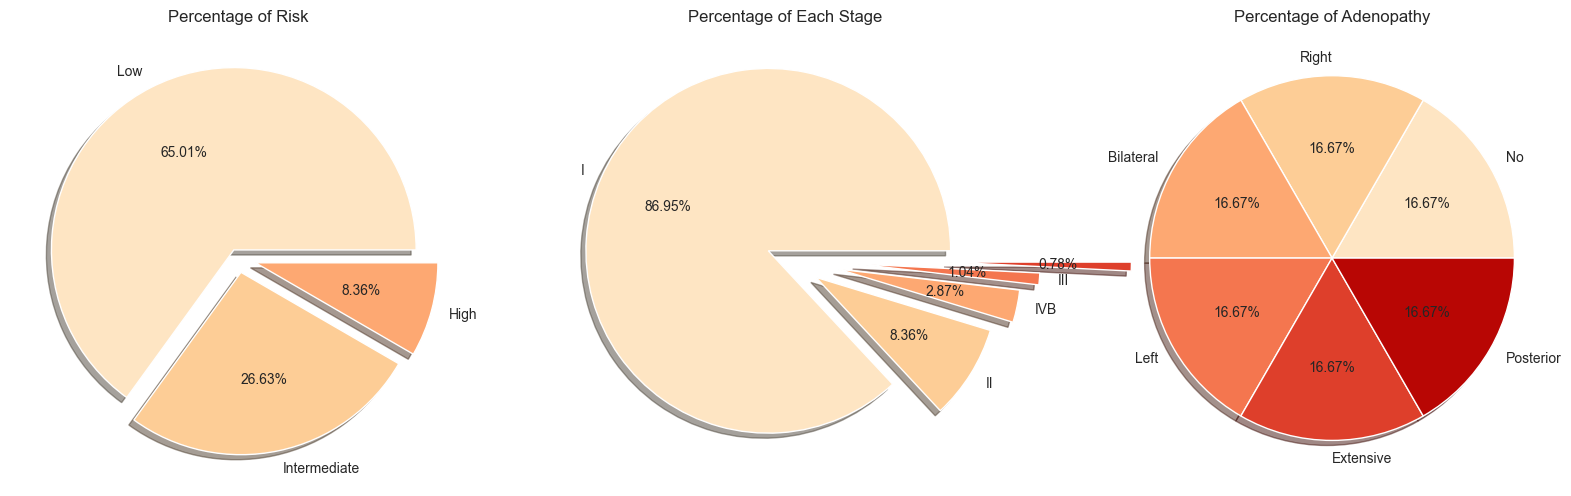

In [88]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = df['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

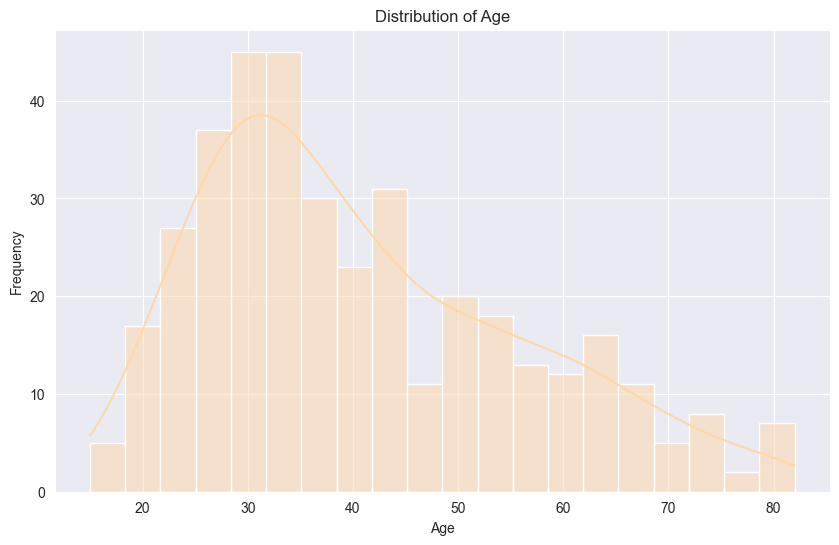

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Scale Age feature 

In [90]:
# scl = MinMaxScaler()
# df.iloc[:, 0] = scl.fit_transform(df.iloc[:, 0:1])

In [91]:
category_columns = df.iloc[:, 1:-1].columns.to_list()
category_columns

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [92]:
ct = ColumnTransformer(
    [
        ('scaled', MinMaxScaler(), ['Age']),
        ('encoder', OneHotEncoder(handle_unknown='ignore'),  category_columns),
    ],
    remainder='passthrough',
    verbose=True,
    verbose_feature_names_out=False
)

In [93]:
df = ct.fit_transform(df)

[ColumnTransformer] ........ (1 of 3) Processing scaled, total=   0.0s
[ColumnTransformer] ....... (2 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [94]:
df = pd.DataFrame(df, columns=ct.get_feature_names_out())

In [95]:
label_encoder = LabelEncoder()
df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Age                                               383 non-null    object
 1   Gender_F                                          383 non-null    object
 2   Gender_M                                          383 non-null    object
 3   Smoking_No                                        383 non-null    object
 4   Smoking_Yes                                       383 non-null    object
 5   Hx Smoking_No                                     383 non-null    object
 6   Hx Smoking_Yes                                    383 non-null    object
 7   Hx Radiothreapy_No                                383 non-null    object
 8   Hx Radiothreapy_Yes                               383 non-null    object
 9   Thyroid Function_Clinical Hypert

In [97]:
df['Age'] = df['Age'].astype('float')

for col in df.iloc[:, 1:].columns:
    df[col] = df[col].astype('int')

In [98]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building a model from XGBoost

In [119]:
cls_model = XGBClassifier(n_estimators=150, learning_rate=0.5, max_depth=5, booster='gbtree')

In [120]:
cls_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [121]:
y_pred = cls_model.predict(X_test)

In [122]:
accuracy = metrics.accuracy_score(y_test, y_pred) 
accuracy

0.974025974025974

In [113]:
cfm = metrics.confusion_matrix
cfm(y_test, cls_model.predict(X_test))

array([[57,  1],
       [ 1, 18]], dtype=int64)

In [129]:
cls_report = metrics.classification_report(y_test, y_pred)

In [130]:
print(cls_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77
